# **CODE**

## Import and Functions

In [6]:
# import
import sys
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter
from tkinter import messagebox
from tkinter import *
from functools import partial
from textblob import TextBlob

# import and clear the training data
train = dict()
train_raw = pd.read_excel("DATA_TL_12.xlsx", sheet_name="Train1", header=None)
for i in range(0,len(train_raw.values)):
    train_clear = str(train_raw.iloc[i][0]).replace("'","").replace(",","").replace("\n","")
    train[train_clear[1:train_clear.find(":")]] = train_clear[(train_clear.find(":") + 2):]
train2 = pd.DataFrame(pd.read_excel("DATA_TL_12.xlsx", sheet_name="Train2", index_col=0))

# import the stop words
stopwords = pd.read_excel("DATA_TL_12.xlsx", sheet_name="Stopwords", header=None)
list_stopwords = []
for i in range(0,len(stopwords.values)):
    list_stopwords.append(stopwords.iloc[i][0])
stopwords = list_stopwords

# clustered emotions
dictemo = pd.read_excel("DATA_TL_12.xlsx", sheet_name="Clustering", index_col=0)

# additional functions
def overallemotion_func():
    global overallemo_dict
    global emotion_dict
    global dictemo
    
    overallemo_dict = {"happiness": 0, 
                       "sadness": 0, 
                       "anger": 0, 
                       "disgust": 0,
                       "surprise": 0, 
                       "fear": 0}

    for emo in list(emotion_dict.keys()):
        quan = emotion_dict[emo]
        for oemo in list(overallemo_dict.keys()):
            mult = dictemo.loc[emo][oemo]
            overallemo_dict[oemo] = overallemo_dict[oemo] + (quan*mult)
    sum_overallemo_dict = sum(list(overallemo_dict.values()))
    for i in list(overallemo_dict.keys()):
        overallemo_dict[i] = round((overallemo_dict[i]/sum_overallemo_dict),4)

def emotion_func(text_words):
    global emotion_dict
    global npemotion_dict    
    global negation_marker
    
    #text_words = text.split()
    if "not" in text_words:
        negation_marker = True
    else:
        negation_marker = False
    
    for word in text_words:
        for sword in stopwords:
            if word == sword:
                text_words.remove(word)

    emotion = []
    for word in text_words:
        for key in list(train.keys()):
            if word == key:
                emotion.append(train[key])
        for key2 in list(train2.index):
            if word == key2:
                emotion = emotion + list(train2.loc[key2][train2.loc[key2].values > 0].index)

    for em in emotion:
        if (em == "Negative") or (em == "Positive"):
            if em in list(npemotion_dict.keys()):
                npemotion_dict[em] = npemotion_dict[em] + 1
            else:
                npemotion_dict[em] = 1
        else:
            if em in list(emotion_dict.keys()):
                emotion_dict[em] = emotion_dict[em] + 1
            else:
                emotion_dict[em] = 1

def clear_text():
    text = input_text.lower()
    for r in text:
        if r in list(string.punctuation):
            text = text.replace(r, "")
    text = TextBlob(text).correct()
    text = text.split()
    for w in text:
        if w in list(["dont","isnt","havent", "shouldnt", "couldnt", "wouldnt"]):
            text.append("not")
    #print(text)
    return text

def pichart_emotion():
    global overallemo_dict

    # pie chart code
    for i in list(overallemo_dict.keys()):
        if overallemo_dict[i] <= 0:
            del overallemo_dict[i]

    emotion_pi=list(overallemo_dict.keys())
    percen=list(overallemo_dict.values())
    Explode= []

    for i in range(0, len(percen)):
        Explode.append(0.08)

    plt.subplots()
    plt.pie(percen,explode=Explode,labels=emotion_pi,shadow=True,startangle=45)
    plt.axis('equal')
    plt.show()
        
def start_emotion_detection():
    global input_text
    input_text = input("Please insert your text: ")
    try:
            text = clear_text()
            emotion_func(text)


            fig, ax1 = plt.subplots()
            ax1.bar(emotion_dict.keys(), emotion_dict.values())
            fig.autofmt_xdate()
            plt.show()
            text = ""
    except:
        print("ERROR! Please try again!")

def posneg_func():
    neg = 0
    pos = 0
    try:
        pos = npemotion_dict['Positive']
    except:
        pos = 0
    try:
        neg = npemotion_dict['Negative']
    except:
        neg = 0
    if pos > neg:
        return "positive"
    elif neg > pos:
        return "negative"
    else:
        return "unclear"

## Execution

Please insert your text: I love ice cream!


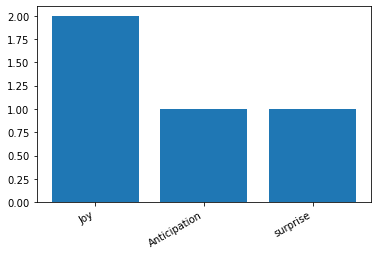



Overall the text shows 0.5 of happiness, 0.0 of sadness, 0.0 of anger, 0.125 of disgust, 0.375 of surprise and 0.0 of fear. The negation of the given text is FALSE.
The overall mood of the given text is positive.


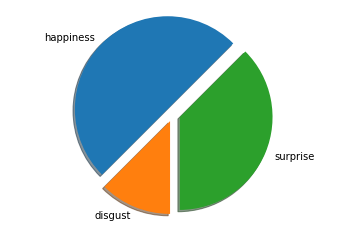

In [8]:
input_text = ""
emotion_dict = dict()
npemotion_dict = dict()
overallemo_dict = dict()
negation_marker = False

start_emotion_detection()
try:
    overallemotion_func()
    if negation_marker == False:
        print("\n")
        print("Overall the text shows",overallemo_dict['happiness'] ,"of happiness,",overallemo_dict['sadness'] ,"of sadness,",overallemo_dict['anger'] ,"of anger,",overallemo_dict['disgust'] ,"of disgust,",overallemo_dict['surprise'] ,"of surprise and",overallemo_dict['fear'] ,"of fear." ,"The negation of the given text is FALSE.")
        print("The overall mood of the given text is", posneg_func()+".")
        pichart_emotion()
    elif negation_marker == True:
        print("\n")
        print("Overall the text shows",overallemo_dict['happiness'] ,"of happiness,",overallemo_dict['sadness'] ,"of sadness,",overallemo_dict['anger'] ,"of anger,",overallemo_dict['disgust'] ,"of disgust,",overallemo_dict['surprise'] ,"of surprise and",overallemo_dict['fear'] ,"of fear, but the negation of the given text is TRUE.")
        print("Therefore some emotions are the opposite of the identified emotions.")
        print("The overall mood of the given text is", posneg_func()+".")
        pichart_emotion()
except:
    print("ERROR! Please try again!")